<a href="https://colab.research.google.com/github/ng328/ML-DL_Projects/blob/main/DecisionTree(Loan_Approval_Dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Problem Statement:
#About Company#
Dream Housing Finance company deals in all home loans.
They have presence across all urban, semi urban and rural areas.
Customer first apply for home loan after that company validates the customer eligibility for loan.
#Problem#
Company wants to automate the loan eligibility process (real time) based on customer detail provided while
filling online application form.
These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/sample_data/loan_approval.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(480, 13)

In [ ]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


In [ ]:
#first convert the categorical column(Gender,Married,Education,Loan_Status) into numeric data using label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Married']=le.fit_transform(df['Married'])
df['Education']=le.fit_transform(df['Education'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,1,0,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,1,0,1,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,0,0,0,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,1,1,2,0,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [ ]:
#splitting the datasets into X and Y.
X=df[['Gender','Married','Education','ApplicantIncome','LoanAmount','Credit_History']]
print(X.head())

   Gender  Married  Education  ApplicantIncome  LoanAmount  Credit_History
1       1        1          0             4583       128.0             1.0
2       1        1          0             3000        66.0             1.0
3       1        1          1             2583       120.0             1.0
4       1        0          0             6000       141.0             1.0
5       1        1          0             5417       267.0             1.0


In [ ]:
Y=df['Loan_Status']
print(Y.head())

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [ ]:
len(x_train)

336

In [ ]:
len(x_test)

144

In [ ]:
#applying DecisionTree algorithm in Loan_approval dataset.
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(random_state=42)
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred=clf.predict(x_test)
print(y_pred)

[1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0
 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0
 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1
 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1]


In [ ]:
compare=pd.DataFrame(zip(y_test,y_pred),columns=['Actual','Predicted'])
compare.head(10)

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1
5,0,0
6,1,1
7,1,1
8,1,1
9,1,1


In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
print('Accuracy:',score)

Accuracy: 0.7361111111111112


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[25, 19],
       [19, 81]])

[Text(0.29609929078014185, 0.9642857142857143, 'X[5] <= 0.5\ngini = 0.427\nsamples = 336\nvalue = [104, 232]'),
 Text(0.09219858156028368, 0.8928571428571429, 'X[4] <= 488.0\ngini = 0.222\nsamples = 55\nvalue = [48, 7]'),
 Text(0.07801418439716312, 0.8214285714285714, 'X[4] <= 129.0\ngini = 0.198\nsamples = 54\nvalue = [48, 6]'),
 Text(0.0425531914893617, 0.75, 'X[4] <= 91.5\ngini = 0.064\nsamples = 30\nvalue = [29, 1]'),
 Text(0.028368794326241134, 0.6785714285714286, 'X[4] <= 85.0\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.014184397163120567, 0.6071428571428571, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.0425531914893617, 0.6071428571428571, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.05673758865248227, 0.6785714285714286, 'gini = 0.0\nsamples = 23\nvalue = [23, 0]'),
 Text(0.11347517730496454, 0.75, 'X[4] <= 173.5\ngini = 0.33\nsamples = 24\nvalue = [19, 5]'),
 Text(0.09929078014184398, 0.6785714285714286, 'X[3] <= 4193.0\ngini = 0.459\nsamples = 14\nvalu

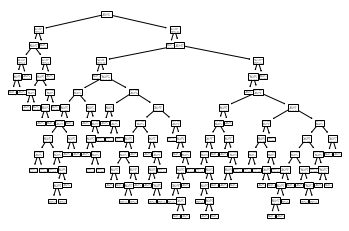

In [ ]:
from sklearn import tree
tree.plot_tree(clf)

In [ ]:
text_representation=tree.export_text(clf)
print(text_representation)

|--- feature_5 <= 0.50
|   |--- feature_4 <= 488.00
|   |   |--- feature_4 <= 129.00
|   |   |   |--- feature_4 <= 91.50
|   |   |   |   |--- feature_4 <= 85.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_4 >  85.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_4 >  91.50
|   |   |   |   |--- class: 0
|   |   |--- feature_4 >  129.00
|   |   |   |--- feature_4 <= 173.50
|   |   |   |   |--- feature_3 <= 4193.00
|   |   |   |   |   |--- feature_3 <= 2373.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_3 >  2373.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_3 >  4193.00
|   |   |   |   |   |--- feature_3 <= 6792.50
|   |   |   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_0 >  0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_3 >  6792.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_4 >  173.5